1.Introduction 
This assignment will help you to consolidate the concepts learnt in the  session. 

2.Problem Statement 

In this assignment, students will be using the K-nearest neighbors  algorithm to predict how many points NBA players scored in the 2013-2014  season. 
A look at the data 
Before we dive into the algorithm, let’s take a look at our data. Each row in  the data contains information on how a player performed in the 2013-2014  NBA season. 

Download 'nba_2013.csv' file from this link: 

https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0 Here are some selected columns from the data: 

player - name of the player 

pos - the position of the player 

g - number of games the player was in 

gs - number of games the player started 

pts - total points the player scored 

There are many more columns in the data, mostly containing information  about average player game performance over the course of the season.  See this site for an explanation of the rest of them. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

print(nba.columns.values)
nba.head()

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


## Checking and Handling Missing Values

In [2]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [3]:
nba["fg."].fillna(nba["fg."].mean(), inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

In [4]:
nba.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

## Feature Selection

In [5]:
## We are Selecting only Numeric Data, as it's regression problem 
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[distance_columns]
nba_numeric.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


##  We will Check behaviour of our data to do Feature Scaling

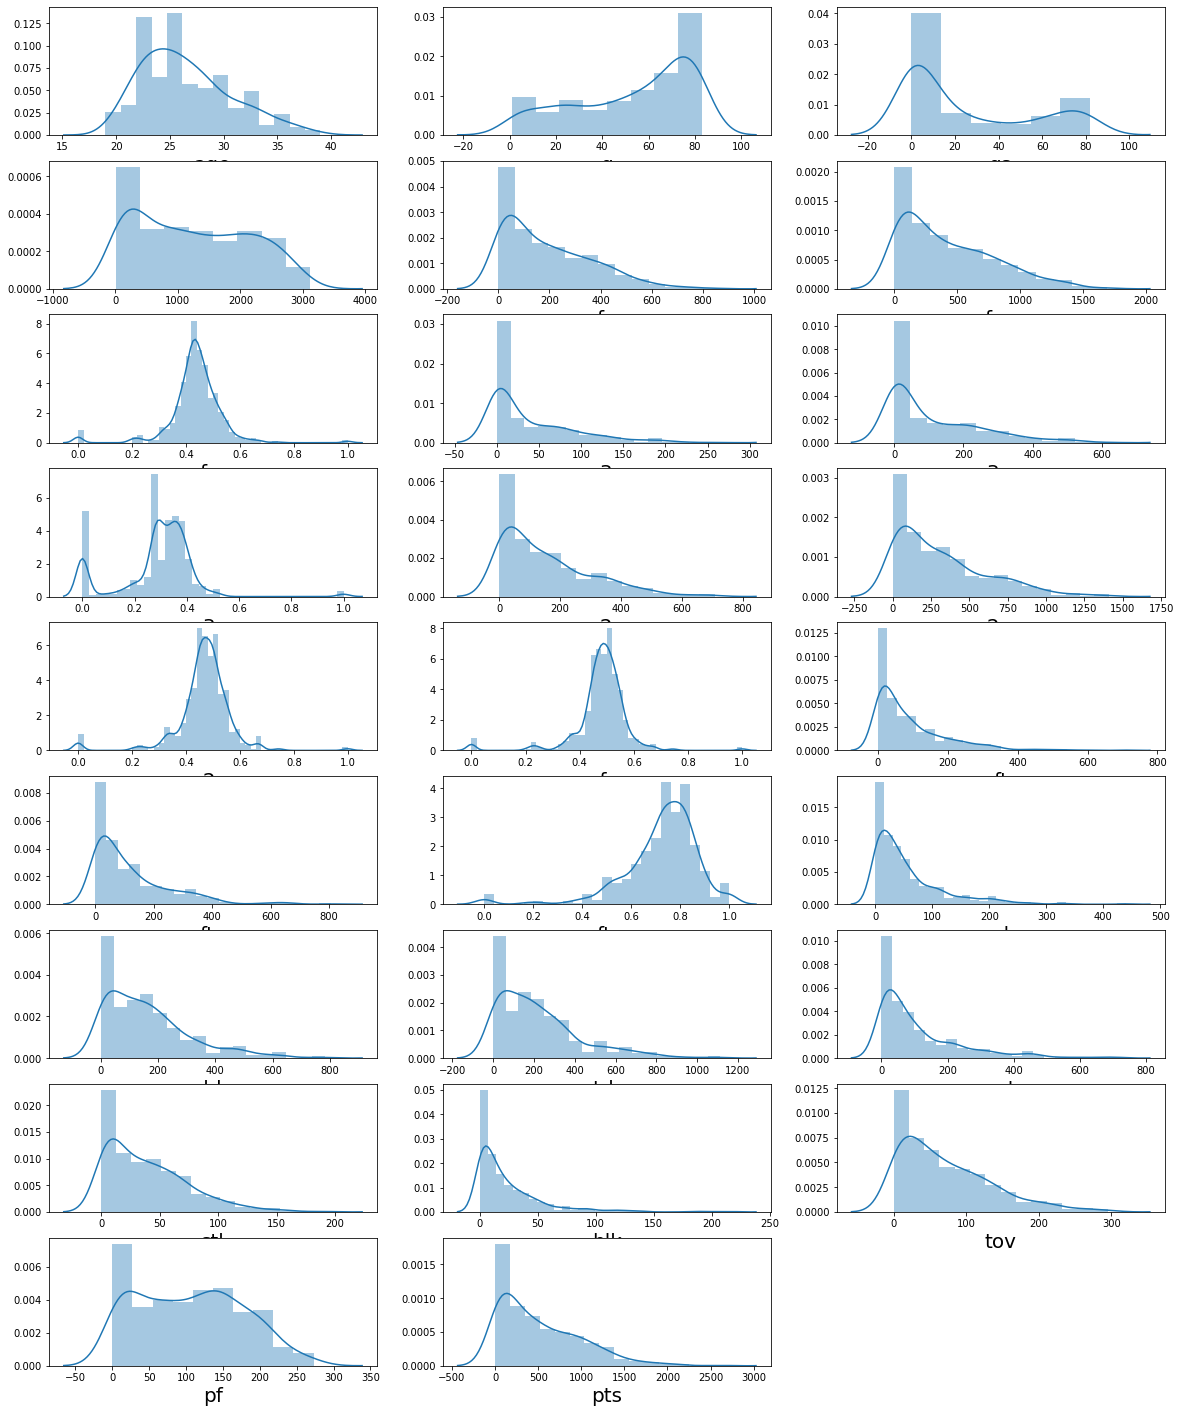

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25), facecolor='White')
plotnumber = 1

for column in nba_numeric:
    if plotnumber <= 26: # As we have 9 columns
        sns.distplot(nba_numeric[column],
                    ax = plt.subplot(9,3,plotnumber))
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

Hence most of our features following Normal Distribution we are going to do feature scaling by Normalisation Techinique

In [7]:
nba_normalized = nba_numeric.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

Now Let's see normalised feature distribution plot

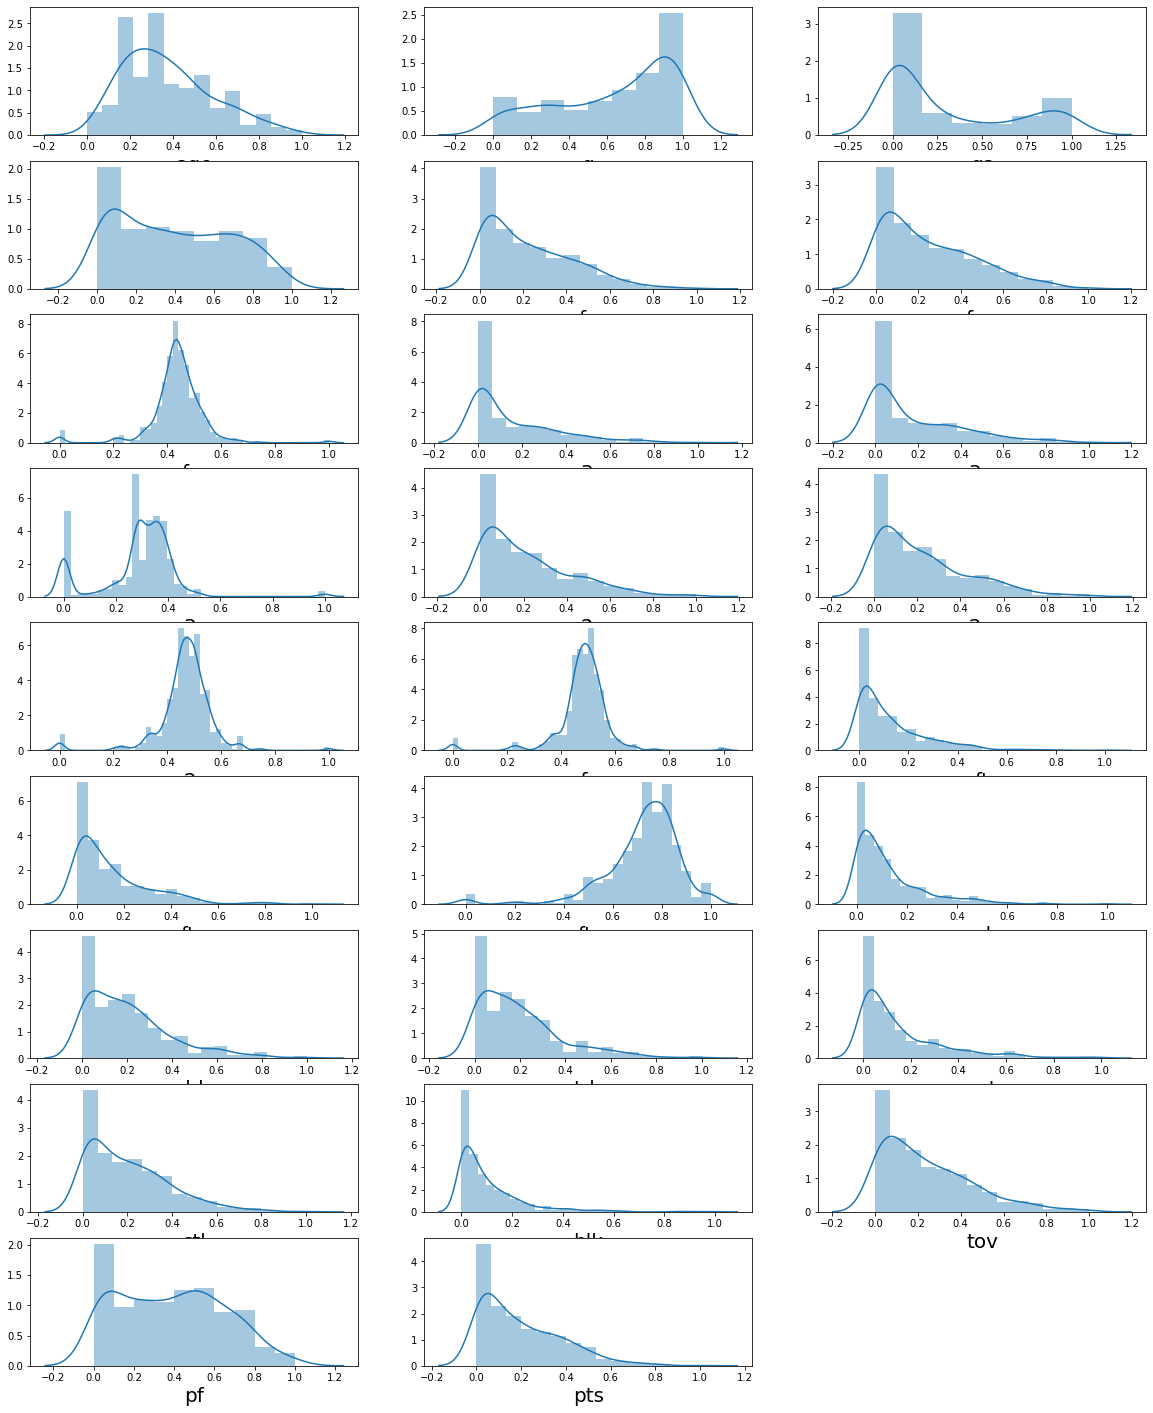

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25), facecolor='White')
plotnumber = 1

for column in nba_normalized:
    if plotnumber <= 26: # As we have 9 columns
        sns.distplot(nba_normalized[column],
                    ax = plt.subplot(9,3,plotnumber))
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

In [9]:
#Categorical Column
nba_category = nba[['player', 'bref_team_id', 'season']]
nba = pd.concat([nba_category, nba_normalized], axis=1)

## Splitting Data Into Training And Testing

In [10]:
from sklearn.model_selection import train_test_split

# The columns that we will be making predictions with.
x_columns = nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

# The column that we want to predict.
y_column = nba["pts"]

x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

## Training KNN Model On Train Set 

In [17]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
for k_value in range(1,10):
    knn=KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format( r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9145 for k_value: 1
Regression score is: 0.9464 for k_value: 2
Regression score is: 0.9548 for k_value: 3
Regression score is: 0.9594 for k_value: 4
Regression score is: 0.9583 for k_value: 5
Regression score is: 0.9579 for k_value: 6
Regression score is: 0.9579 for k_value: 7
Regression score is: 0.9609 for k_value: 8
Regression score is: 0.9576 for k_value: 9


In [18]:
## As we got highest Accuracy for K value=8
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print ("Mean Squared Error is:", format(mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0011143
Regression score is: 0.9609


In [19]:
Test_With_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})

Test_With_Predicted

,Actual Points,Predicted Points
0,0.168145,0.125723
1,0.276514,0.297243
2,0.422676,0.363189
3,0.007327,0.011088
4,0.381026,0.373939
...,...,...
140,0.426919,0.421664
141,0.013498,0.019379
142,0.312379,0.303943
143,0.306980,0.273766
